In [1]:
### Useful Variables ###

NUM_SEEDS = 20
NUM_AGENTS = 10
SAMPLE_MODE = "top"
NORMALIZE = True
STACK = True

ENV_NAME = "BipedalWalker-v2"
RUN_NAME = "PPO"
DEFAULT_CONFIG = {}

YAML_PATH = "data/300-agents-ppo.yaml"

In [2]:
import numpy as np

import ray
from ray.rllib.agents.registry import get_agent_class
import yaml
import seaborn as sns

from process_data import make_ordereddict
from process_fft import evaluate_different_agents

%matplotlib inline
ray.init(ignore_reinit_error=True, log_to_driver=False)

W0817 11:53:21.668237 140033215506176 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term
2019-08-17 11:53:23,336	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-08-17_11-53-23_335364_31027/logs.
2019-08-17 11:53:23,467	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:53891 to respond...
2019-08-17 11:53:23,590	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:24612 to respond...
2019-08-17 11:53:23,595	INFO services.py:809 -- Starting Redis shard with 10.0 GB max memory.
2019-08-17 11:53:23,626	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-08-17_11-53-23_335364_31027/logs.
2019-08-17 11:53:23

{'node_ip_address': '10.1.72.24',
 'redis_address': '10.1.72.24:53891',
 'object_store_address': '/tmp/ray/session_2019-08-17_11-53-23_335364_31027/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2019-08-17_11-53-23_335364_31027/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2019-08-17_11-53-23_335364_31027'}

In [3]:
def restore(ckpt):
    cls = get_agent_class(RUN_NAME)
    agent = cls(env=ENV_NAME, config=DEFAULT_CONFIG)
    agent.restore(ckpt)
    return agent

In [7]:
with open(YAML_PATH, 'r') as f:
    checkpoints = yaml.safe_load(f)

In [9]:
agent_ckpt_dict = make_ordereddict(checkpoints, NUM_AGENTS, mode='top')

agent_dict = {
    agent_name: restore(ckpt) for agent_name, ckpt in agent_ckpt_dict.items()
}

W0817 11:53:24.949395 140033215506176 deprecation_wrapper.py:119] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/tune/logger.py:133: The name tf.VERSION is deprecated. Please use tf.version.VERSION instead.

W0817 11:53:24.951246 140033215506176 deprecation_wrapper.py:119] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/tune/logger.py:138: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

2019-08-17 11:53:24,969	ERROR log_sync.py:34 -- Log sync requires cluster to be setup with `ray up`.
2019-08-17 11:53:25,058	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:53:25,251	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
W0817 11:53:26.334315 140033215506176 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/r

(pid=31305) WARNING: Logging before flag parsing goes to stderr.
(pid=31305) W0817 11:53:31.220563 139920429049600 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31305) Instructions for updating:
(pid=31305) non-resource variables are not supported in the long term
(pid=31273) WARNING: Logging before flag parsing goes to stderr.
(pid=31273) W0817 11:53:31.418916 140250943145728 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31273) Instructions for updating:
(pid=31273) non-resource variables are not supported in the long term
(pid=31305) 2019-08-17 11:53:31,613	INFO rol

(pid=31273) W0817 11:53:32.516029 140250943145728 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=31273) Instructions for updating:
(pid=31273) Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-08-17 11:53:33,194	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:53:33,204	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 11:53:34,616	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f59bc3d65c0>}
2019-08-17 11:53:34,617	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f59bc3d64e0>}
2019-08-17 11:53:34,618	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7f59bc3d6390>}
2019-08-17 11:53:34,654	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']


(pid=31294) WARNING: Logging before flag parsing goes to stderr.
(pid=31294) W0817 11:53:36.759412 139934698526464 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31294) Instructions for updating:
(pid=31294) non-resource variables are not supported in the long term
(pid=31278) WARNING: Logging before flag parsing goes to stderr.
(pid=31278) W0817 11:53:36.851770 140088902395648 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31278) Instructions for updating:
(pid=31278) non-resource variables are not supported in the long term
(pid=31294) 2019-08-17 11:53:37,133	INFO rol

2019-08-17 11:53:38,796	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:53:38,810	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 11:53:40,314	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f54cc3409b0>}
2019-08-17 11:53:40,315	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f54cc3408d0>}
2019-08-17 11:53:40,316	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7f54ccbb9710>}
2019-08-17 11:53:40,351	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']


(pid=31280) WARNING: Logging before flag parsing goes to stderr.
(pid=31280) W0817 11:53:42.436650 140411246561024 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31280) Instructions for updating:
(pid=31280) non-resource variables are not supported in the long term
(pid=31261) WARNING: Logging before flag parsing goes to stderr.
(pid=31261) W0817 11:53:42.477455 139903061137152 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31261) Instructions for updating:
(pid=31261) non-resource variables are not supported in the long term
(pid=31280) 2019-08-17 11:53:42,830	INFO rol

2019-08-17 11:53:44,568	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:53:44,581	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 11:53:46,036	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f5492ce8da0>}
2019-08-17 11:53:46,037	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f5492ce8cc0>}
2019-08-17 11:53:46,038	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7f5492d23c50>}
2019-08-17 11:53:46,088	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']


(pid=31293) WARNING: Logging before flag parsing goes to stderr.
(pid=31293) W0817 11:53:48.251045 140319845746432 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31293) Instructions for updating:
(pid=31293) non-resource variables are not supported in the long term
(pid=31260) WARNING: Logging before flag parsing goes to stderr.
(pid=31260) W0817 11:53:48.312077 140141706258176 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31260) Instructions for updating:
(pid=31260) non-resource variables are not supported in the long term
(pid=31293) 2019-08-17 11:53:48,635	INFO rol

2019-08-17 11:53:50,435	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:53:50,446	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 11:53:51,972	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f5474e561d0>}
2019-08-17 11:53:51,974	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f5474e560f0>}
2019-08-17 11:53:51,976	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7f5474e4cf60>}
2019-08-17 11:53:52,016	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']


(pid=31310) WARNING: Logging before flag parsing goes to stderr.
(pid=31310) W0817 11:53:54.142210 140291838543616 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31310) Instructions for updating:
(pid=31310) non-resource variables are not supported in the long term
(pid=31253) WARNING: Logging before flag parsing goes to stderr.
(pid=31253) W0817 11:53:54.106409 139710079174400 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31253) Instructions for updating:
(pid=31253) non-resource variables are not supported in the long term
(pid=31253) 2019-08-17 11:53:54,507	INFO rol

(pid=31253) W0817 11:53:55.354306 139710079174400 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=31253) Instructions for updating:
(pid=31253) Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-08-17 11:53:56,240	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:53:56,253	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 11:53:57,723	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f544aff9550>}
2019-08-17 11:53:57,724	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f544aff9470>}
2019-08-17 11:53:57,725	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7f544aff9240>}
2019-08-17 11:53:57,762	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']


(pid=31268) WARNING: Logging before flag parsing goes to stderr.
(pid=31268) W0817 11:53:59.835246 140712632932096 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31268) Instructions for updating:
(pid=31268) non-resource variables are not supported in the long term
(pid=31291) WARNING: Logging before flag parsing goes to stderr.
(pid=31291) W0817 11:53:59.917924 140080988579584 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31291) Instructions for updating:
(pid=31291) non-resource variables are not supported in the long term
(pid=31268) 2019-08-17 11:54:00,247	INFO rol

(pid=31291) W0817 11:54:01.142920 140080988579584 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=31291) Instructions for updating:
(pid=31291) Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-08-17 11:54:02,126	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:54:02,141	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 11:54:03,618	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f543095b940>}
2019-08-17 11:54:03,619	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f543095b860>}
2019-08-17 11:54:03,620	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7f543095b668>}
2019-08-17 11:54:03,659	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']
2019-08-17 11:54:07,298	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy mod

(pid=31266) WARNING: Logging before flag parsing goes to stderr.
(pid=31266) W0817 11:54:09.704358 140073117439744 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31266) Instructions for updating:
(pid=31266) non-resource variables are not supported in the long term
(pid=31299) WARNING: Logging before flag parsing goes to stderr.
(pid=31299) W0817 11:54:09.703528 140685354329856 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31299) Instructions for updating:
(pid=31299) non-resource variables are not supported in the long term
(pid=31287) WARNING: Logging before flag par

(pid=31266) W0817 11:54:12.182377 140073117439744 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=31266) Instructions for updating:
(pid=31266) Use `tf.cast` instead.
(pid=31299) W0817 11:54:12.188033 140685354329856 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=31299) Instructions for updating:
(pid=31299) Use `tf.cast` instead.
(pid=31287) W0817 11:54:12.295042 139803460130560 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=3128

2019-08-17 11:54:13,685	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:54:13,706	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 11:54:15,203	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f53e5472160>}
2019-08-17 11:54:15,206	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f53e5472080>}
2019-08-17 11:54:15,207	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7f53e546be48>}
2019-08-17 11:54:15,248	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']


(pid=31271) WARNING: Logging before flag parsing goes to stderr.
(pid=31271) W0817 11:54:17.348864 140407848376064 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31271) Instructions for updating:
(pid=31271) non-resource variables are not supported in the long term
(pid=31276) WARNING: Logging before flag parsing goes to stderr.
(pid=31276) W0817 11:54:17.394352 140497325393664 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31276) Instructions for updating:
(pid=31276) non-resource variables are not supported in the long term
(pid=31271) 2019-08-17 11:54:17,719	INFO rol

(pid=31276) W0817 11:54:18.534389 140497325393664 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=31276) Instructions for updating:
(pid=31276) Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-08-17 11:54:18,891	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2019-08-17 11:54:18,901	INFO rollout_worker.py:319 -- Creating policy evaluation worker 0 on CPU (please ignore any CUDA init errors)
2019-08-17 11:54:20,375	INFO rollout_worker.py:742 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7f53c2d975f8>}
2019-08-17 11:54:20,378	INFO rollout_worker.py:743 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f53c2d97518>}
2019-08-17 11:54:20,379	INFO rollout_worker.py:356 -- Built filter map: {'default_policy': <ray.rllib.utils.filter.NoFilter object at 0x7f53c2d97400>}
2019-08-17 11:54:20,429	INFO multi_gpu_optimizer.py:93 -- LocalMultiGPUOptimizer devices ['/cpu:0']


(pid=31245) WARNING: Logging before flag parsing goes to stderr.
(pid=31245) W0817 11:54:22.608119 139650988037888 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31245) Instructions for updating:
(pid=31245) non-resource variables are not supported in the long term
(pid=31308) WARNING: Logging before flag parsing goes to stderr.
(pid=31308) W0817 11:54:22.678150 139988622542592 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=31308) Instructions for updating:
(pid=31308) non-resource variables are not supported in the long term
(pid=31245) 2019-08-17 11:54:23,024	INFO rol

(pid=31245) W0817 11:54:23.805342 139650988037888 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=31245) Instructions for updating:
(pid=31245) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=31308) W0817 11:54:23.865169 139988622542592 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=31308) Instructions for updating:
(pid=31308) Use tf.where in 2.0, which has the same broadcast rule as np.where


# Normalize Version Stack Rollouts

In [10]:
df_norm = evaluate_different_agents(
    agent_dict, 
    list(range(NUM_SEEDS)), 
    normalize=NORMALIZE, 
    stack_rollout=STACK
)

2019-08-17 11:54:25,101	INFO tf_run_builder.py:92 -- Executing TF run without tracing. To dump TF timeline traces to disk, set the TF_TIMELINE_DIR environment variable.


Current Testing Agent: PPO seed=193 rew=289.17, Seed: 0
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 1
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 2
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 3
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 4
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 5
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 6
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 7
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 8
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 9
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 10
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 11
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 12
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 13
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 14
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 15
Current Testing Agent: PPO seed=193 rew=289.17, Seed: 16
Current Testing Agent: PPO seed=193 rew=2

/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Current Testing Agent: PPO seed=289 rew=289.88, Seed: 0
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 1
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 2
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 3
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 4
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 5
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 6
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 7
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 8
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 9
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 10
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 11
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 12
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 13
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 14
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 15
Current Testing Agent: PPO seed=289 rew=289.88, Seed: 16
Current Testing Agent: PPO seed=289 rew=2

Current Testing Agent: PPO seed=121 rew=299.35, Seed: 6
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 7
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 8
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 9
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 10
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 11
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 12
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 13
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 14
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 15
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 16
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 17
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 18
Current Testing Agent: PPO seed=121 rew=299.35, Seed: 19


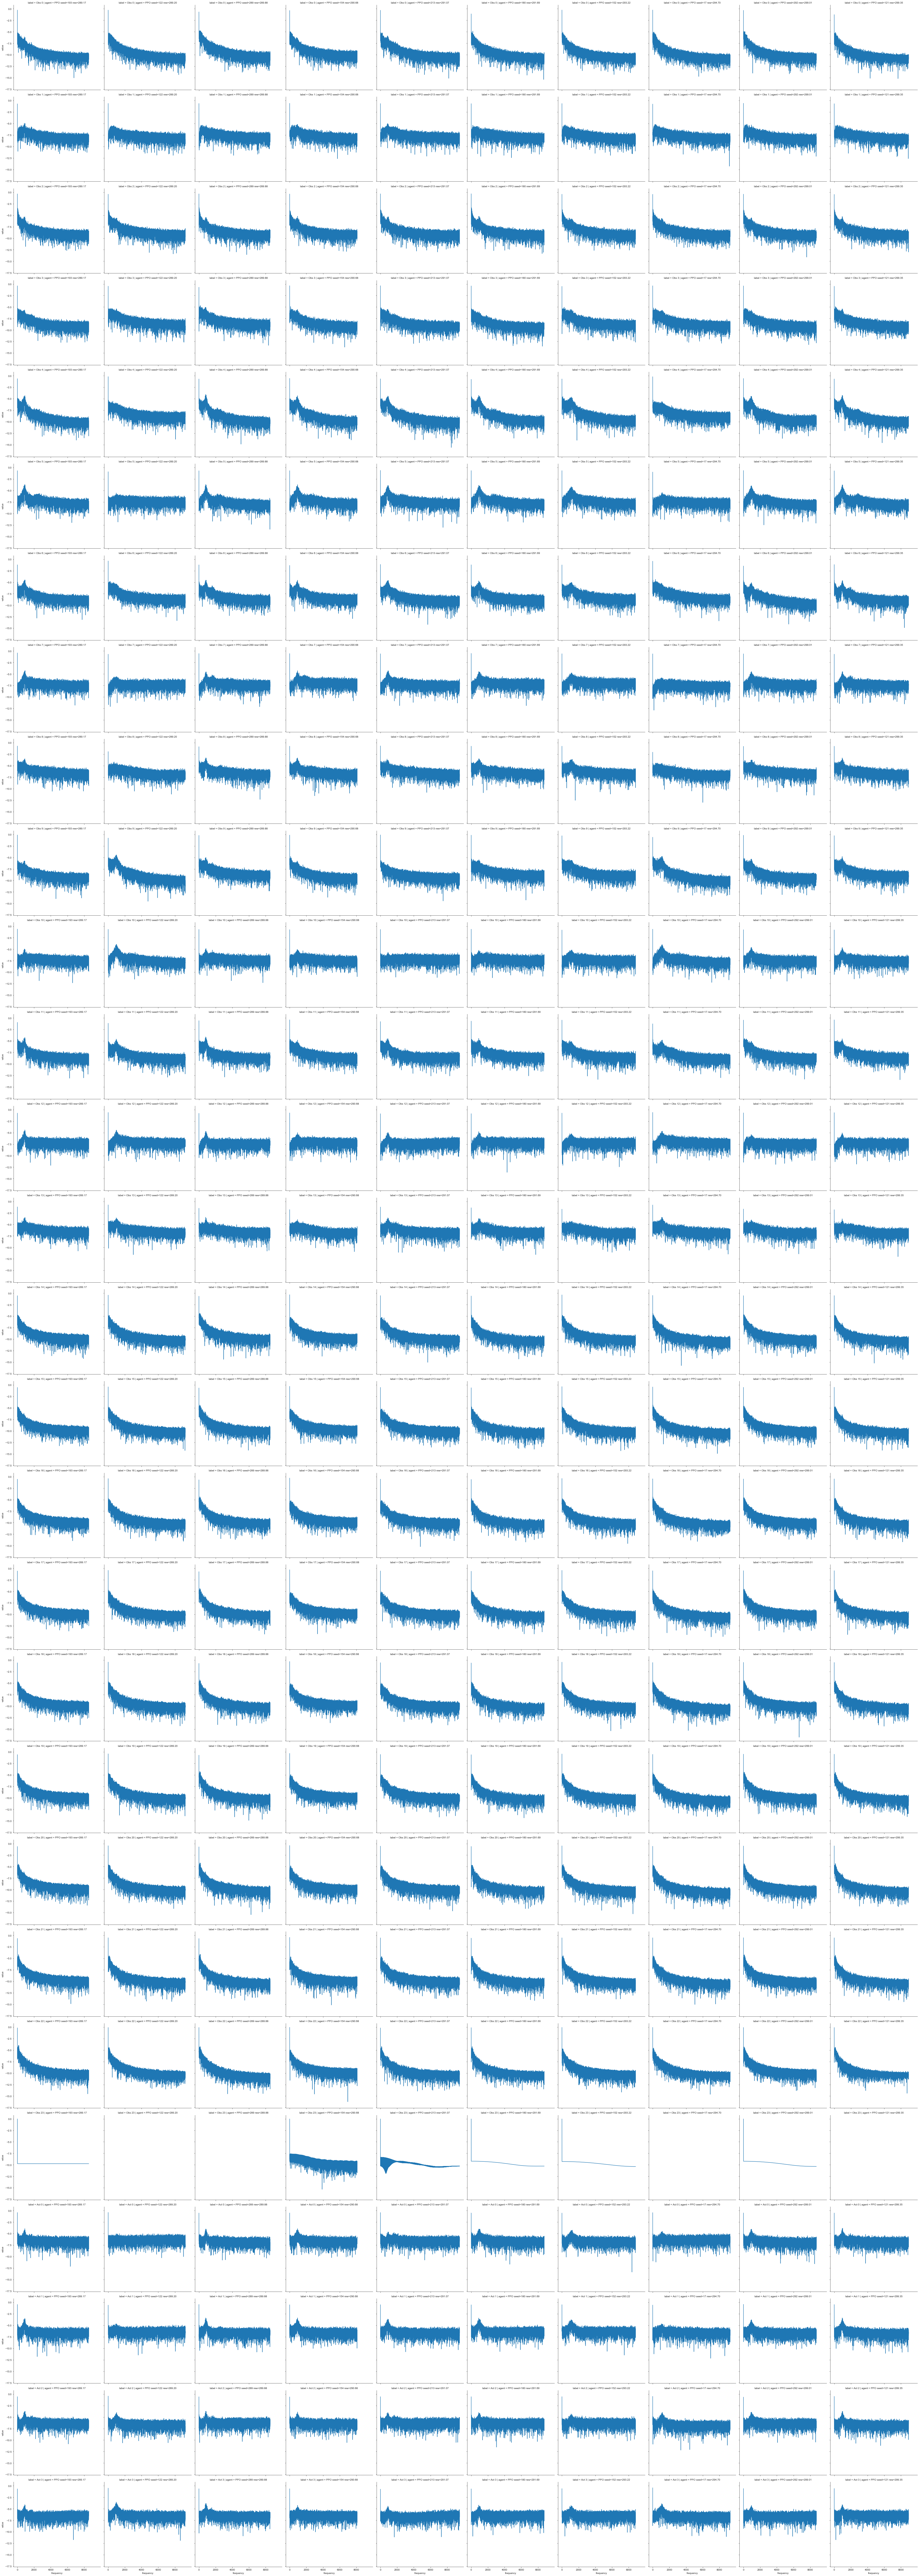

In [11]:
sns.set_style("ticks")
sns.relplot(x="frequency", y="value", col="agent", row="label", kind="line", data=df_norm)